# Importação das Bibliotecas

In [78]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from IPython.display import display
from PIL import Image
import locale

# Leitura e Análise da Base

In [3]:
# Leitura da planilha 
DADOS = r"C:\Users\rodri\OneDrive\Sincronização\Documentos\GitHub\confidence_interval_marketplace_sales\data\olist_order_items_dataset.xlsx"
df = pd.read_excel(DADOS)

# Visualizar as primeiras linhas da tabela
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/17 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-03-05 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/18 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/18 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/17 13:57,199.90,18.14


In [4]:
# Visualizar as últimas linhas da tabela
df.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-02-05 04:11:00,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/18 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/17 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/17 0:04,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-12-06 17:10:00,43.00,12.79


In [5]:
# Conferir os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [79]:
# Definir o locale para o formato brasileiro
locale.setlocale(locale.LC_NUMERIC, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

# Problema de Negócio

Uma empresa presente nos maiores marketplaces do Brasil resolveu fazer um estudo para avaliar o valor dos produtos vendidos e o valor do frete. Para isso, coletou uma amostra de mais de 100 mil vendas com seus respectivos fretes.

O estudo foi dividido em três etapas:

---

## 1. Estimativa Pontual e por Intervalo  

### 📌 1.1. Cálculo da Estimativa Pontual  
- **Preço médio** dos pedidos  
- **Valor médio** do frete  

### 📌 1.2. Intervalos de Confiança  
- Calcular os **intervalos de confiança** para preço e frete considerando um **coeficiente de confiança de 95%**  
- Definir a **probabilidade** de que esses intervalos contenham o **verdadeiro valor da média populacional**  

---

## 2. Margem de Erro e Tamanho da Amostra  

### 🎯 2.1. Cálculo da Margem de Erro  
- Determinar a **margem de erro** do **preço** com base na amostra  
- Determinar a **margem de erro** do **frete** com base na amostra  

### 🎯 2.2 Cálculo do Tamanho Mínimo da Amostra  
- Determinar o **tamanho mínimo da amostra** necessário para que:  
  - A **margem de erro** na **estimativa do preço** seja **inferior a R\$ 0,10**  
  - A **margem de erro** na **estimativa do frete** seja **inferior a R\$ 0,05**  
- Considerando um **coeficiente de confiança de 95%**  

---

## 3. Proporção de Pedidos com Preço Acima da Média  

### 📊 3.1. Definição da Variável  
- Criar uma nova coluna chamada **"preço > média"**, com os seguintes valores:  
  - **1** se o preço do pedido for **maior** que a média calculada  
  - **0** caso contrário  

### 📊 3.2. Cálculo da Proporção  
- Determinar as **estimativas pontuais e por intervalo** do percentual da variável **"preço > média"**  
- Com base nessas estimativas, avaliar se o **preço médio** dos pedidos é **maior ou menor** do que o **preço mediano**  

In [124]:
# Definição da variáveis das amostras
amostra_price = df["price"].to_numpy()
amostra_freight = df["freight_value"].to_numpy()

# Nível de confiança de 95%
conf_95 = 0.95

### 1. Estimativa Pontual e por Intervalo

### 📌 1.1. Cálculo da Estimativa Pontual  
- **Preço médio** dos pedidos  
- **Valor médio** do frete  

In [57]:
# Definição das variáveis do preço médio dos pedidos e do valor médio do frete
media_price = amostra_price.mean()
media_freight = amostra_freight.mean()

# Exibição dos resultados
print(f"Preço Médio: R$ {media_price:.2f}")
print(f"Preço Médio: R$ {media_freight:.2f}")

Preço Médio: R$ 120.65
Preço Médio: R$ 19.99


### 📌 1.2. Intervalos de Confiança  
- Calcular os **intervalos de confiança** para preço e frete considerando um **coeficiente de confiança de 95%**  
- Definir a **probabilidade** de que esses intervalos contenham o **verdadeiro valor da média populacional**  

In [120]:
# Função para calcular as estatísticas iniciais
def calcular_estatisticas(amostra, conf):
    n = len(amostra)
    variancia_amostral = np.var(amostra, ddof=1)
    t_critico = abs(stats.t.ppf((1 - conf_95) / 2, df=n-1))
    erro_padrao = amostra.std(ddof=1) / np.sqrt(n) 
    
    # Retornar um dicionário com os resultados
    return {
        'amostra': n,
        'variancia_amostral': variancia_amostral,
        't_critico': t_critico,
        'erro_padrao': erro_padrao
    }

# Função para calcular intervalo de confiança do preço
def intervalo_confianca(conf, media, erro_padrao, n):
    t_critico = abs(stats.t.ppf((1 - conf) / 2, df=n-1))
    limite_inferior = media - t_critico * erro_padrao
    limite_superior = media + t_critico * erro_padrao
    return t_critico, limite_inferior, limite_superior

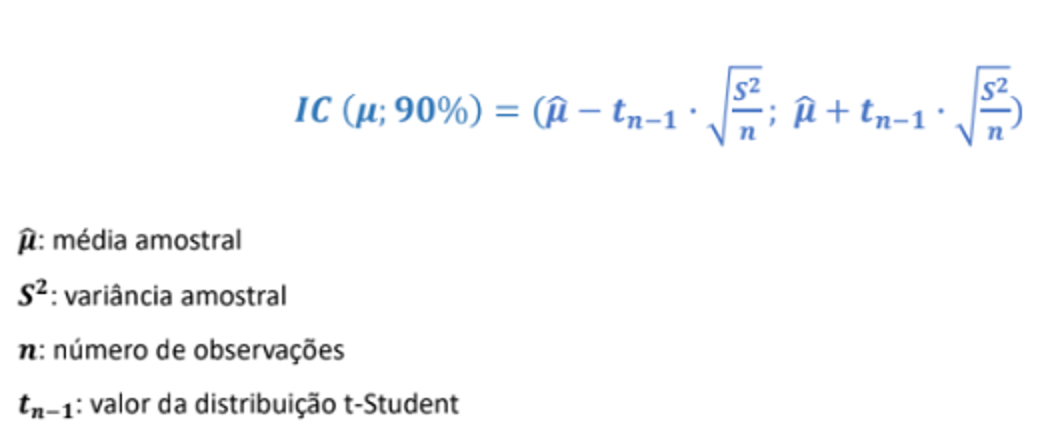

In [135]:
# Abrindo a imagem
image = Image.open("../images/intervalo_confianca.png")

# Defina um novo tamanho (exemplo: 2x maior)
new_size = (image.width * 2, image.height * 2)
image_resized = image.resize(new_size)

# Exibir a imagem redimensionada
display(image_resized)

In [168]:
# Estatísticas básicas para 'preço'
estatisticas_preco = calcular_estatisticas(amostra_price, conf_95)

# Exibir os resultados
print(f"Estatísticas para Preço:")
print(f"- Tamanho da Amostra: {locale.format_string('%d', estatisticas_preco['amostra'], grouping=True)}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_preco['variancia_amostral'], grouping=True)}")
print(f"- T-1: {estatisticas_preco['t_critico']:.2f}")
print(f"- Erro Padrão: {estatisticas_preco['erro_padrao']:.2f}")

# Intervalo de Confiança do Preço Médio
t_critico_preco, limite_inferior_preco, limite_superior_preco = intervalo_confianca(
    conf_95, 
    media_price, 
    estatisticas_preco['erro_padrao'], 
    estatisticas_preco['amostra']
)

# Exibir resultados do Preço Médio
print("\n\033[1;34mIntervalo de Confiança do Preço Médio:\033[0m")
print(f"T-Crítico: {t_critico_preco:.2f}")
print(f"\033[1;31mLimite Inferior:\033[0m {limite_inferior_preco:.2f}")
print(f"\033[1;32mLimite Superior:\033[0m {limite_superior_preco:.2f}")

Estatísticas para Preço:
- Tamanho da Amostra: 112.650
- Variância Amostral: 33.721,42
- T-1: 1.96
- Erro Padrão: 0.55

Intervalo de Confiança do Preço Médio:
T-Crítico: 1.96
Limite Inferior: 119.58
Limite Superior: 121.73


In [169]:
# Estatísticas básicas para 'frete'
estatisticas_frete = calcular_estatisticas(amostra_freight, conf_95)

print(f"\nEstatísticas para Frete:")
print(f"- Tamanho da Amostra: {locale.format_string('%d', estatisticas_frete['amostra'], grouping=True)}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_frete['variancia_amostral'], grouping=True)}")
print(f"- T-1: {estatisticas_frete['t_critico']:.2f}")
print(f"- Erro Padrão: {estatisticas_frete['erro_padrao']:.2f}")

# Intervalo de Confiança do Frete
t_critico_frete, limite_inferior_frete, limite_superior_frete = intervalo_confianca(
    conf_95, 
    media_freight, 
    estatisticas_frete['erro_padrao'], 
    estatisticas_frete['amostra']
)

# Exibir resultados do Frete
print("\n\033[1;34mIntervalo de Confiança do Frete:\033[0m")
print(f"T-Crítico: {t_critico_frete:.2f}")
print(f"\033[1;31mLimite Inferior:\033[0m {limite_inferior_frete:.2f}")
print(f"\033[1;32mLimite Superior:\033[0m {limite_superior_frete:.2f}")


Estatísticas para Frete:
- Tamanho da Amostra: 112.650
- Variância Amostral: 249,84
- T-1: 1.96
- Erro Padrão: 0.05

Intervalo de Confiança do Frete:
T-Crítico: 1.96
Limite Inferior: 19.90
Limite Superior: 20.08


#### Qual é a probabilidade de que esses intervalos de confiança contenham o verdadeiro valor da média populacional?

#### Em 95% das amostras que calcularmos o IC, o verdadeiro valor está contido. Isso não significa que há uma chance de 95% dele estar contido no intervalo calculado.

## 2. Margem de Erro e Tamanho da Amostra  

### 🎯 2.1. Cálculo da Margem de Erro  
- Determinar a **margem de erro** do **preço** com base na amostra  
- Determinar a **margem de erro** do **frete** com base na amostra  

In [170]:
# Estatísticas básicas para 'preço'
estatisticas_preco = calcular_estatisticas(amostra_price, conf_95)

# Exibir os resultados da variável 'preço'
print("\nEstatísticas para Preço:")
print(f"- Tamanho da Amostra: {locale.format_string('%d', estatisticas_preco['amostra'], grouping=True)}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_preco['variancia_amostral'], grouping=True)}")
print(f"- Z: {estatisticas_preco['t_critico']:.2f}")

margem_erro_preco = estatisticas_preco['t_critico'] * estatisticas_preco['erro_padrao']
print("\n\033[1;33mMargem de Erro:\033[0m", f"\033[1;32m{margem_erro_preco:.2f}\033[0m")


Estatísticas para Preço:
- Tamanho da Amostra: 112.650
- Variância Amostral: 33.721,42
- Z: 1.96

Margem de Erro: 1.07


In [171]:
# Estatísticas básicas para 'frete'
estatisticas_frete = calcular_estatisticas(amostra_freight, conf_95)

# Exibir os resultados da variável 'frete'
print("\nEstatísticas para Frete:")
print(f"- Tamanho da Amostra: {locale.format_string('%d', estatisticas_frete['amostra'], grouping=True)}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_frete['variancia_amostral'], grouping=True)}")
print(f"- T-1: {estatisticas_frete['t_critico']:.2f}")
print(f"- Erro Padrão: {estatisticas_frete['erro_padrao']:.2f}")

margem_erro_frete = estatisticas_frete['t_critico'] * estatisticas_frete['erro_padrao']
print("\n\033[1;33mMargem de Erro:\033[0m", f"\033[1;32m{margem_erro_frete:.2f}\033[0m")


Estatísticas para Frete:
- Tamanho da Amostra: 112.650
- Variância Amostral: 249,84
- T-1: 1.96
- Erro Padrão: 0.05

Margem de Erro: 0.09


### 🎯 2.2 Cálculo do Tamanho Mínimo da Amostra  
- Determinar o **tamanho mínimo da amostra** necessário para que:  
  - A **margem de erro** na **estimativa do preço** seja **inferior a R\$ 0,10**  
  - A **margem de erro** na **estimativa do frete** seja **inferior a R\$ 0,05**   

In [172]:
# Estatísticas básicas para 'preço'
estatisticas_preco = calcular_estatisticas(amostra_price, conf_95)

nova_margem_erro_preco = 0.10

# Exibir os resultados da variável 'preço'
print("\nEstatísticas para Preço:")
print(f"- Nível de Confiança: {conf_95 * 100:.0f}%")
print(f"- Margem de Erro: {nova_margem_erro_preco:.2f}")
print(f"- Z: {estatisticas_preco['t_critico']:.2f}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_preco['variancia_amostral'], grouping=True)}")


# Calcular o mínimo tamanho de amostra para que a margem de erro na estimativa do preço seja inferior a R$ 0,10
novo_n = (estatisticas_preco['variancia_amostral'] * 
          (estatisticas_preco['t_critico'] ** 2) / 
          (nova_margem_erro_preco ** 2))


# Exibir o novo tamanho da amostra
print(f"\nNovo Tamanho da Amostra Necessário para Margem de Erro de R$ {nova_margem_erro_preco:.2f}:")
print(f"- Tamanho da amostra (n): {locale.format_string('%d', round(novo_n), grouping=True)}")


Estatísticas para Preço:
- Nível de Confiança: 95%
- Margem de Erro: 0.10
- Z: 1.96
- Variância Amostral: 33.721,42

Novo Tamanho da Amostra Necessário para Margem de Erro de R$ 0.10:
- Tamanho da amostra (n): 12.954.223


In [173]:
# Estatísticas básicas para 'frete'
estatisticas_frete = calcular_estatisticas(amostra_freight, conf_95)

nova_margem_erro_frete = 0.05

# Exibir os resultados da variável 'preço'
print("\nEstatísticas para Frete:")
print(f"- Nível de Confiança: {conf_95 * 100:.0f}%")
print(f"- Margem de Erro: {nova_margem_erro_frete:.2f}")
print(f"- Z: {estatisticas_frete['t_critico']:.2f}")
print(f"- Variância Amostral: {locale.format_string('%.2f', estatisticas_frete['variancia_amostral'], grouping=True)}")


# Calcular o mínimo tamanho de amostra para que a margem de erro na estimativa do preço seja inferior a R$ 0,10
novo_n = (estatisticas_frete['variancia_amostral'] * 
          (estatisticas_frete['t_critico'] ** 2) / 
          (nova_margem_erro_frete ** 2))


# Exibir o novo tamanho da amostra
print(f"\nNovo Tamanho da Amostra Necessário para Margem de Erro de R$ {nova_margem_erro_frete:.2f}:")
print(f"- Tamanho da amostra (n): {locale.format_string('%d', round(novo_n), grouping=True)}")


Estatísticas para Frete:
- Nível de Confiança: 95%
- Margem de Erro: 0.05
- Z: 1.96
- Variância Amostral: 249,84

Novo Tamanho da Amostra Necessário para Margem de Erro de R$ 0.05:
- Tamanho da amostra (n): 383.912


#### 